In [2]:
#import packages
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

---
Import Dataset

In [3]:
#data import
game_data = pd.read_csv('data/clean_data.csv')

In [4]:
#Check the vital statistics of the dataset using the `type` and `shape` attributes.
print("Data type : ", type(game_data))
print("Data dims : ", game_data.shape)

#Check the variables (and their types) in the dataset using the `dtypes` attribute.
print(game_data.dtypes)

#quick look at the data
game_data.head()

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (18174, 31)
Unnamed: 0                      int64
AppID                           int64
Name                           object
Release date                   object
Estimated owners               object
Peak CCU                        int64
Required age                    int64
Price                         float64
DLC count                       int64
About the game                 object
Supported languages            object
Full audio languages           object
Reviews                         int64
Windows                          bool
Mac                              bool
Linux                            bool
Metacritic score                int64
Positive                        int64
Negative                        int64
Recommendations                 int64
Notes                          object
Average playtime forever        int64
Average playtime two weeks      int64
Median playtime forever         int64
Median playt

,Unnamed: 0,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,...,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Rate_Ratio
0,5,1469160,Wartune Reborn,"Feb 26, 2021",50000 - 100000,68,0,0.00,0,Feel tired of auto-fight? Feel tired of boring...,...,0,0,0,0,7Road,7Road,"Single-player,Multi-player,MMO,PvP,Online PvP,...","Adventure,Casual,Free to Play,Massively Multip...","Turn-Based Combat,Massively Multiplayer,Multip...",0.639706
1,8,1178150,MazM: Jekyll and Hyde,"Apr 2, 2020",0 - 20000,1,0,14.99,0,'MazM: Jekyll and Hyde' is a darkly entertaini...,...,0,0,0,0,Growing Seeds,"CFK Co., Ltd.","Single-player,Steam Achievements,Full controll...","Adventure,RPG,Simulation,Strategy","Adventure,Simulation,RPG,Strategy,Singleplayer...",0.926829
2,9,320150,Deadlings: Rotten Edition,"Nov 11, 2014",50000 - 100000,0,0,3.99,0,Death is lonely. He has zero friends on his Fa...,...,703,0,782,0,ONE MORE LEVEL,ONE MORE LEVEL,"Single-player,Steam Achievements,Steam Trading...","Action,Adventure,Indie","Action,Indie,Adventure,Puzzle-Platformer,Arcad...",0.833333
3,10,1026420,WARSAW,"Oct 2, 2019",20000 - 50000,5,0,23.99,0,Use everything at your disposal to help a team...,...,67,0,93,0,Pixelated Milk,"Pixelated Milk,gaming company","Single-player,Steam Achievements,Steam Trading...","Indie,RPG","Tactical RPG,Turn-Based Strategy,Wargame,Histo...",0.735331
4,11,485000,Cthulhu Realms,"Jul 1, 2016",50000 - 100000,0,0,0.00,1,Star Realms has gone insane! Introducing Cthul...,...,224,0,257,0,"Wise Wizard Games, LLC","Wise Wizard Games, LLC","Single-player,Multi-player,Shared/Split Screen...",Strategy,"Card Game,Strategy,Deckbuilding,Lovecraftian,B...",0.717073


In [5]:
game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18174 entries, 0 to 18173
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  18174 non-null  int64  
 1   AppID                       18174 non-null  int64  
 2   Name                        18174 non-null  object 
 3   Release date                18174 non-null  object 
 4   Estimated owners            18174 non-null  object 
 5   Peak CCU                    18174 non-null  int64  
 6   Required age                18174 non-null  int64  
 7   Price                       18174 non-null  float64
 8   DLC count                   18174 non-null  int64  
 9   About the game              18149 non-null  object 
 10  Supported languages         18174 non-null  object 
 11  Full audio languages        18174 non-null  object 
 12  Reviews                     18174 non-null  int64  
 13  Windows                     181

---
Positive: number of positive reviews <br>
Negative: number of negative reviews

In [6]:
rate_ratio = pd.DataFrame(game_data["Rate_Ratio"])
price = pd.DataFrame(game_data['Price']) 
rate_price = pd.DataFrame(game_data[["Rate_Ratio", "Price"]])

In [7]:
rate_price['Rate_Ratio'] = rate_price['Rate_Ratio'] * 100

rate_price.describe().round(2)

,Rate_Ratio,Price
count,18174.00,18174.00
mean,78.09,10.75
std,15.70,11.21
min,2.53,0.00
25%,69.61,1.99
50%,81.69,7.99
75%,90.21,14.99
max,100.00,89.99


<AxesSubplot:>

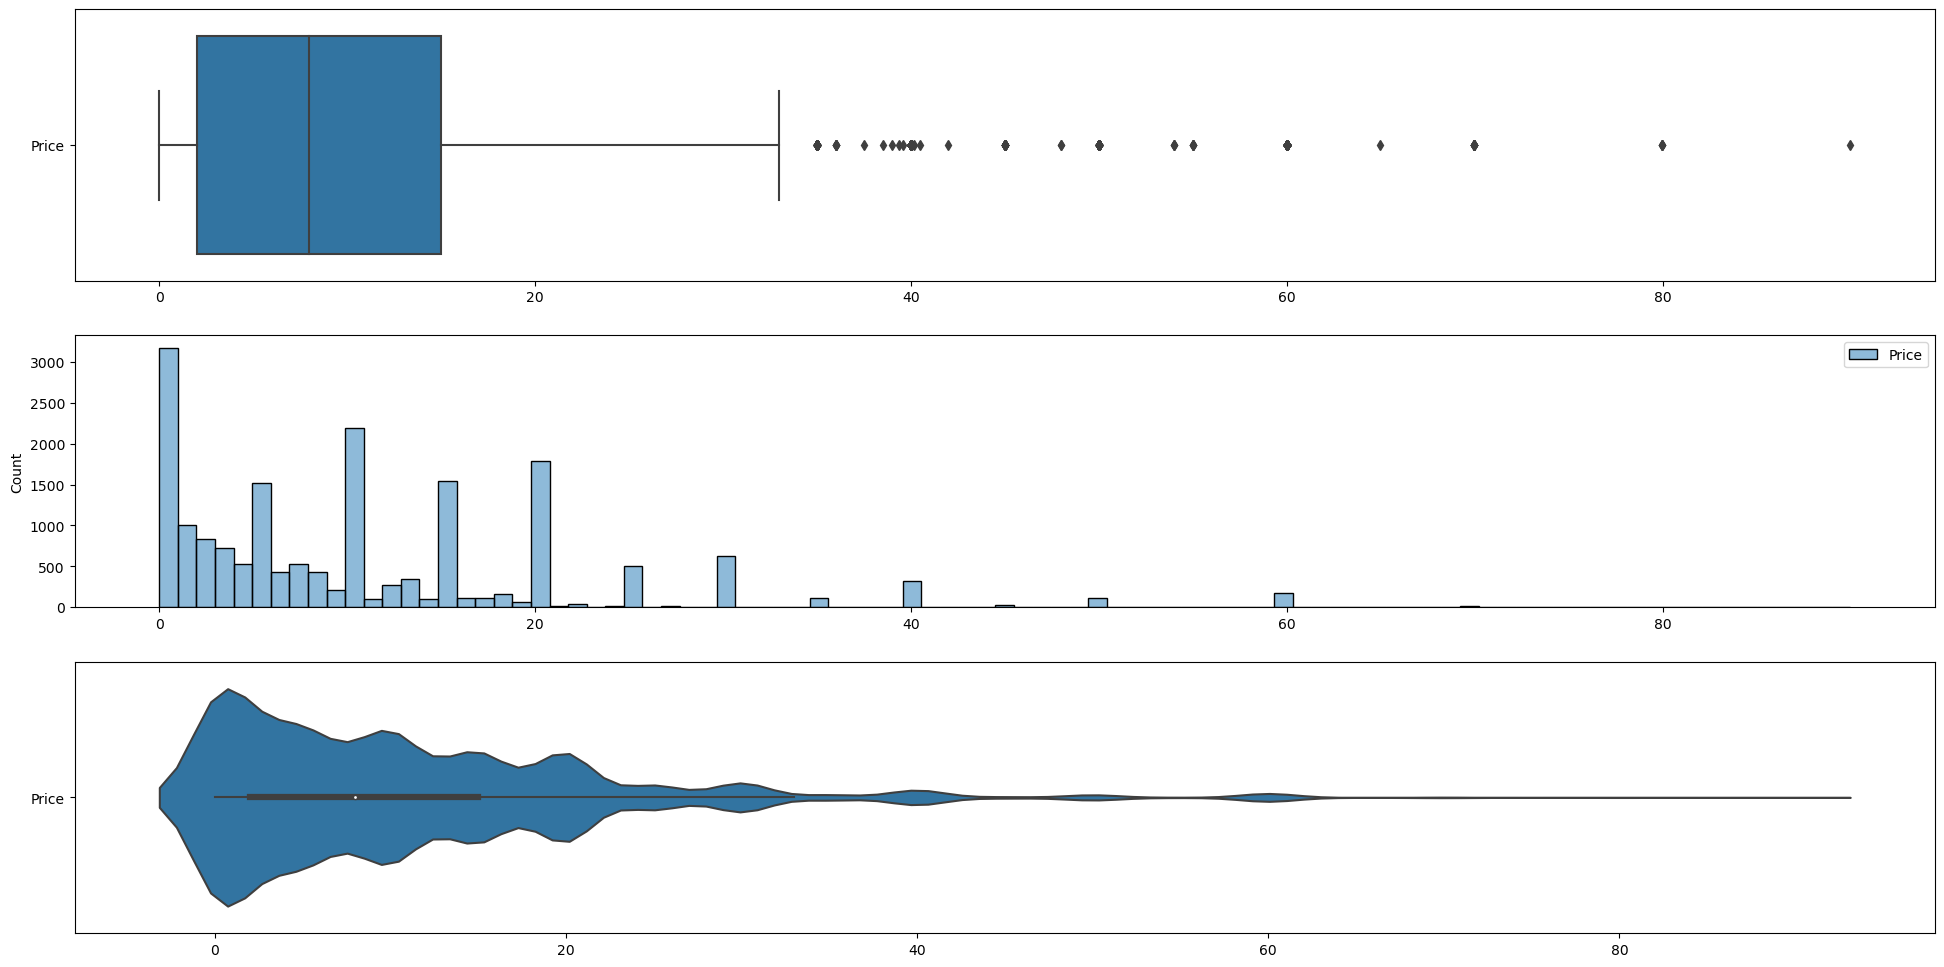

In [8]:
f, axes = plt.subplots(3, 1, figsize=(24, 12))
plt.ticklabel_format(style='plain')
sb.boxplot(data = price, orient = "h", ax = axes[0])
sb.histplot(data = price, ax = axes[1])
sb.violinplot(data = price, orient = "h", ax = axes[2])

In [9]:
rate_price.corr()

,Rate_Ratio,Price
Rate_Ratio,1.000000,0.095401
Price,0.095401,1.000000


In [10]:
#remove free games
no_free = rate_price[rate_price.Price != 0]
no_free.describe().round(2)

,Rate_Ratio,Price
count,15330.00,15330.00
mean,78.59,12.75
std,15.61,11.12
min,2.53,0.44
25%,70.51,4.99
50%,82.29,9.99
75%,90.52,18.99
max,100.00,89.99


            Rate_Ratio     Price
Rate_Ratio    1.000000  0.078094
Price         0.078094  1.000000


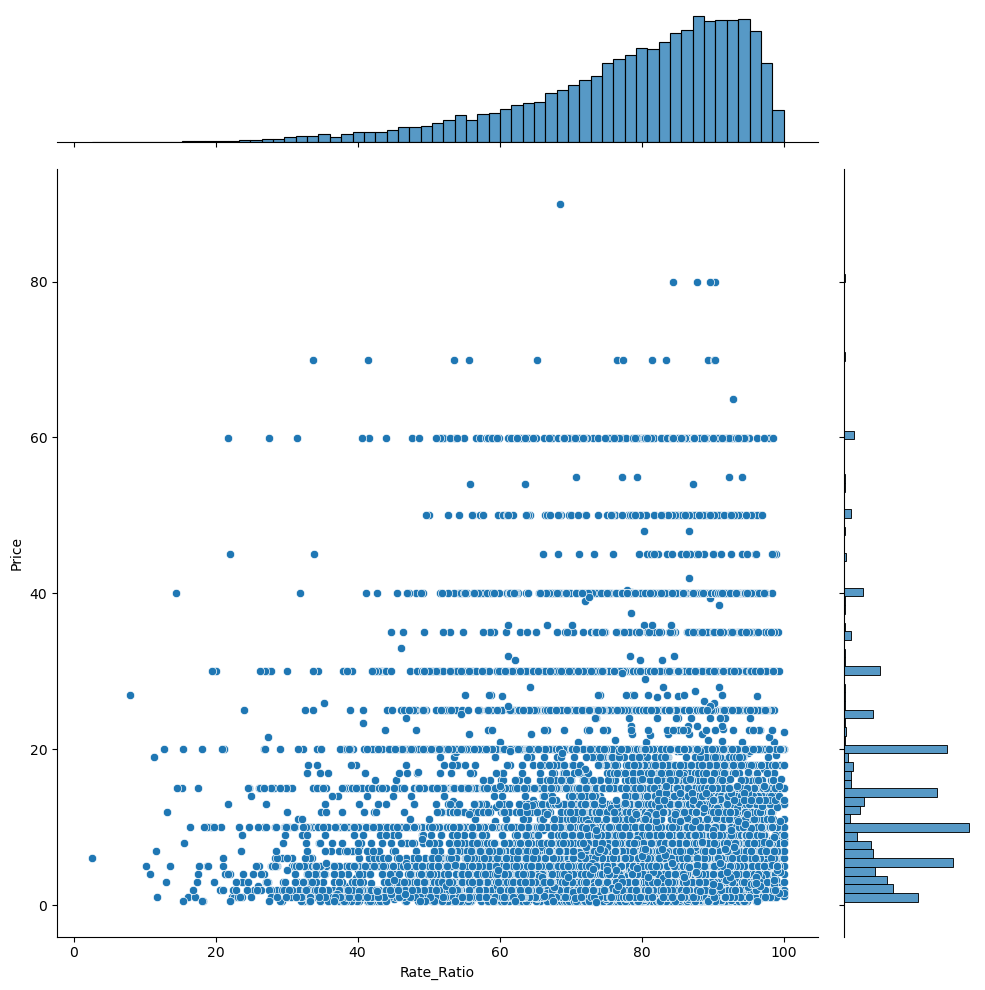

In [21]:
print(no_free.corr())
sb.jointplot(data=no_free, x="Rate_Ratio", y="Price", height=10)
